# Initiation aux traitement d'images satellitaires 

## Enoncé :
L'objectif de ce TP est de comprendre les traitements de base que nous pouvons appliquer sur
les images satellitaires (Données de télédétection) et qui serviront dans les TP suivants. Nous
allons donc voir comment charger une image et faire quelques opérations de base sur cellesci.
Pour l'application considérée, les images sont de taille 800 x 400 pixels prise par le satellite
LANDSAT 5 TM (Thematic Mapper) en 2003 de la région d’Oran nord-ouest. Sachant que ce
satellite contient plusieurs capteurs dans notre cas nous travaillerons avec 4 canaux 1, 2, 3 et
4.

Etape1 : ouverture des images satellitaires
- Lecture et affichage des images satellitaires (TM1, TM2, TM3 et TM4) captés au niveau
de gris et observer le résultat obtenu.

Etape 2 : affichage d’une image en couleur
- Faire une composition de trois images des 3 canaux, sauvegarder l'image résultant et
observer le résultat obtenu pour les deux cas :

A- La première composition TM3, TM2 et TM1

B- La deuxième composition TM4, TM2 et TM1
- Est-il possible de faire d’autres compositions

Etape 3 : afficher l’histogramme des images satellitaires en nuances de gris
- Affiche l’histogramme aux niveaux de gris pour les trois images TM1, TM2 et TM3.
- Est-il possible de faire pour une image en couleur


## Etape1 : ouverture des images satellitaires

In [1]:
import numpy as np#pour manipuler des tableau
import matplotlib.pyplot as plt## requis pour les histogrames
import matplotlib.image as mpimg##pour la lectur d'image en fonction de son nom de fichier suiv de point puis 
                                    #son extension

In [2]:
def ReadAffiche(ImageFile):###fonction de lecture d'image 
    try:
            img = mpimg.imread(ImageFile) #ImageFile est un chaine de caracteres d'image d'entrée avec  
                                            #point suivi de son extension et eventuellement with avec le repertoire
                                            ##img est un 
                                            ##matrice 3d (ne veut pas dire modele 3d) mais 
                                            ##contient successivement
                                            #dans la 1er dimension:coordonné x du pixel
                                            #dans le 2eme dimension:coordonné y du pixel
                                            #dans le 3eme dimension:niveau couleur du pixel
    
    except IOError: ##le cas si fichier a lire est inexistant
        print('ERREUR ,l\'image:' + ImageFile+'NON trouvé')
        sys.exit(1)
    
    # affichge du titre d'image
    print(ImageFile+":")
    
    # affichage de l'image
    plt.imshow(img)
    plt.show()
    return img##retour d'image lue en tant que matrice au 3axes (pas en tant que modele 3d) qui contient successivement
                #dans la 1er dimension:coordonné x du pixel
                #dans le 2eme dimension:coordonné y du pixel
                #dans le 3eme dimension:niveau couleur du pixel
        

TM1.BMP:


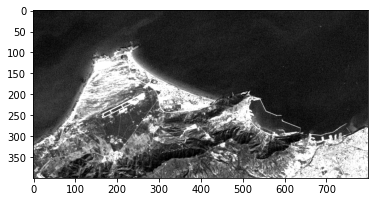

TM2.BMP:


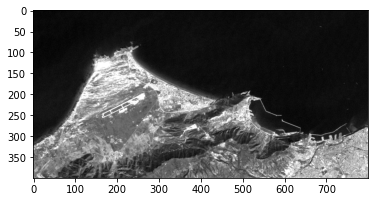

TM3.BMP:


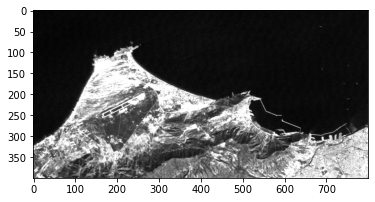

TM4.BMP:


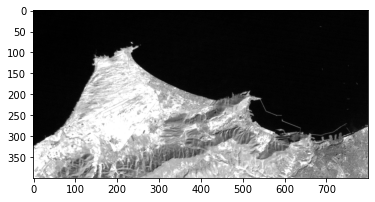

TM5.BMP:


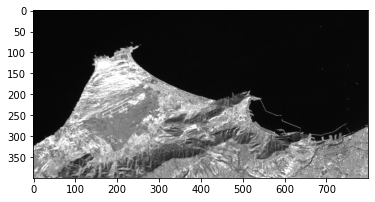

TM7.BMP:


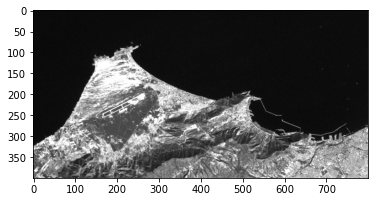

In [5]:

# ouverture du fichier image
i=1
while(i<=7):##on fait du boucle car il existe les image d'entrée a utiliser comme ça TM1.BMP/TM2.BMP/.../TM7.BMP
    if(i != 6):    #car le fichier TM6.BMP n'existe pas
        ImageFile = 'TM'+str(i)+'.BMP'
        img=ReadAffiche(ImageFile)
    i=i+1


ces image sont selon l'enoncé sont les image d'un certain niveau de couleur
    tq:
                 niveau du gris      0         apparence partielle       255
                                noir <------------------------------------> blanc 
                            (element A NON-apparent)                 (element A totalment apparent)

            cad plus l'elemnt A a la lumiere (plus proche du blanc cad plus proche d'intesite du pixel qui est 255) plus que  l'elemnt A est apparent




REMARQUE POUR LES PROCHAINES ANALYSE :
 le synatxe suivante adopte est:

        image tmZ: liste des elements tq -element j:apparent(total) ou non ou partiellement apparent



et selon mes analyses:



image tm1:
           route: apparent mais confondu avec les batiment (on un intensité similaire --> ce qui peut nous confondre entre les routes est batiment) c'est a dire c'est le couleur gris des roche du terrasee et celle de l'asphalte           
           vegetation : aucun
           montagne terrestre :aucun 
           batiment: oui
           mer : oui
            
image tm2: route: la meme remarque que la image precedent
           vegetation : partielle
           montagne terrestre :partielle 
           batiment: oui
           mer : non
           
image tm3: route: la meme remarque que la image precedent
           vegetation : oui
           montagne terrestre :aucun 
           batiment: partiellement
           mer : non
            
image tm4: route: oui
           vegetation : oui
           montagne terrestre :partly
           batiment: non
           mer : non
image tm5: route: oui
           vegetation : aucun
           montagne terrestre :partly
           batiment: non
           mer : oui
image tm7: route: oui (avec meilleur distinction)
           vegetation : aucun
           montagne terrestre :aucun 
           batiment: partielle
           mer : non
           
           
dans tout les images l'element roches (dans brise vague): est apparent (qui est en realite au couleur marron café clair) 


# Etape 2 : affichage d’une image en couleur

## -A:  composition TM3/TM2/TM1

TM3.BMP:


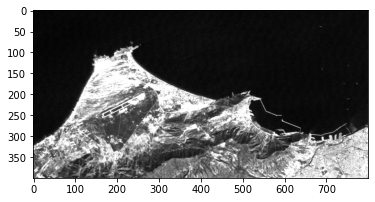

TM2.BMP:


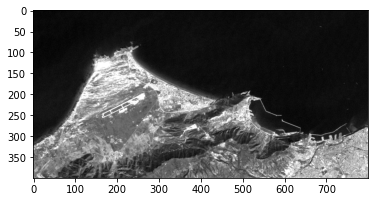

TM1.BMP:


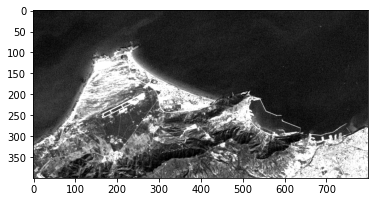

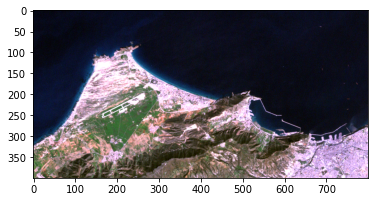

In [6]:
sizex=400 #largeur
sizey=800 #largeur

imgRGB=np.zeros([sizex, sizey,3]) #CREATION DU MATRICE IMAGE INITIALE


temp3=ReadAffiche('TM3.BMP') #lecture de TM3.BMP au variable temporaire temp3 
temp2=ReadAffiche('TM2.BMP') #lecture de TM2.BMP au variable temporaire temp2
temp1=ReadAffiche('TM1.BMP') #lecture de TM1.BMP au variable temporaire temp1


####assignation des image au different niveau de couleur RGB (3eme argument) du imgRGB
imgRGB[:,:,0]=temp3[:,:,0]/255#rouge level
imgRGB[:,:,1]=temp2[:,:,1]/255#green level
imgRGB[:,:,2]=temp1[:,:,2]/255#blue level

####on a du dans les 3 dernieres instruction de diviser en 255 car les 
####imag matrice temp1,temp2,temp3 sont au format entier et imgRGB est flottante 
####dans ce car la conversion du temp1,temp2,temp3 est obligatoire ce qui est fait par division sur 255


plt.imshow(imgRGB)
plt.show()

# REMARQUE:
l'instruction TEMPORAIRE [  mpimg.imsave("CLR.bmp",imgRGB,cmap="gray"); ] qui sauvegard l'image
avec le titre "CLR.bmp"  est utilisé pour avoir 
l'image couleur resultante de cette cellule en format bmp pour le dernier question et pour plus de credibilité

### fun-fact: 
j'ai essayé de sauvegarder l'image resultante de cette cellule comme dans les 
site web (façon clique droit /sauvegrader dans un repertoire) mais j'ai obtenu en format png et j'ai essayé 
de le convetir en bmp par gimp mais le dernier question est echoué avec ce bmp de gimp 

## B : 421

TM4.BMP:


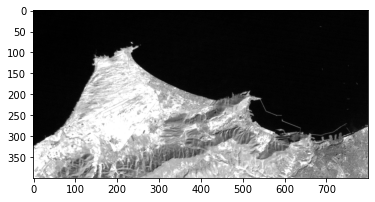

TM2.BMP:


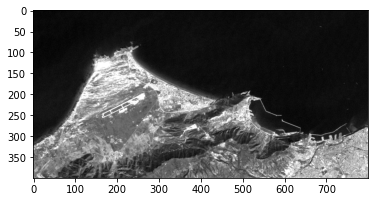

TM1.BMP:


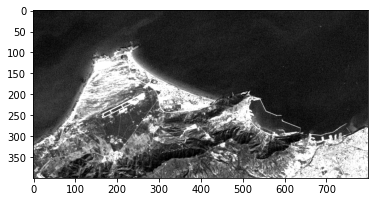

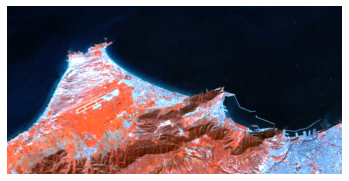

In [7]:
#meme procedé pour 


temp3=ReadAffiche('TM4.BMP') #lecture de TM3.BMP au variable temporaire temp3 
temp2=ReadAffiche('TM2.BMP') #lecture de TM2.BMP au variable temporaire temp2
temp1=ReadAffiche('TM1.BMP') #lecture de TM1.BMP au variable temporaire temp1

imgRGB[:,:,0]=temp3[:,:,0]/255
imgRGB[:,:,1]=temp2[:,:,1]/255
imgRGB[:,:,2]=temp1[:,:,2]/255

plt.imshow(imgRGB)
plt.axis('off')
plt.show()

## SUPPLEMENTAIRE: combo  tm2/tm3/tm4 (fausse couleur avec quasi-infrarouge)

TM2.BMP:


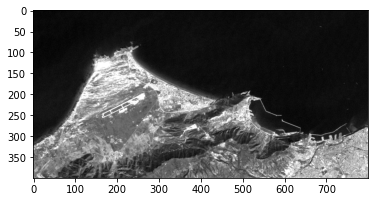

TM3.BMP:


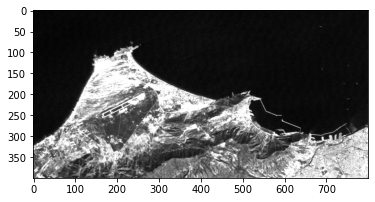

TM4.BMP:


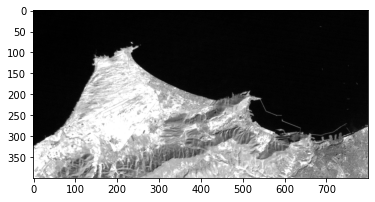

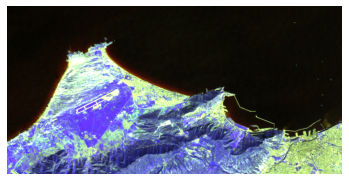

In [8]:
#ainsi de suite
temp3=ReadAffiche('TM2.BMP') 
temp2=ReadAffiche('TM3.BMP') 
temp1=ReadAffiche('TM4.BMP') 


imgRGB[:,:,0]=temp3[:,:,0]/255
imgRGB[:,:,1]=temp2[:,:,1]/255
imgRGB[:,:,2]=temp1[:,:,2]/255

plt.imshow(imgRGB)
plt.axis('off')
plt.show()

## SUPPLEMENTAIRE: combo  tm1/tm3/tm2 (strictement fausse couleur SANS INFRAROUGE sans quasi infrarouge)

TM1.BMP:


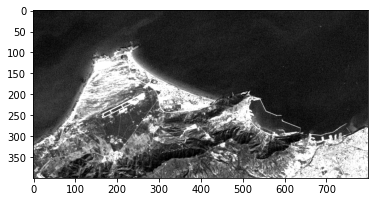

TM3.BMP:


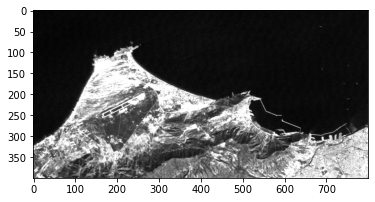

TM2.BMP:


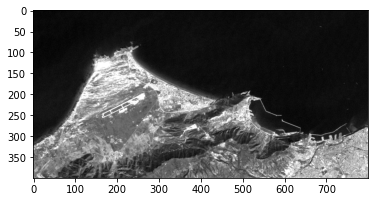

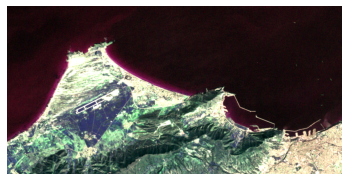

In [9]:
#etc..
temp3=ReadAffiche('TM1.BMP') 
temp2=ReadAffiche('TM3.BMP') 
temp1=ReadAffiche('TM2.BMP') 


imgRGB[:,:,0]=temp3[:,:,0]/255
imgRGB[:,:,1]=temp2[:,:,1]/255
imgRGB[:,:,2]=temp1[:,:,2]/255

plt.imshow(imgRGB)
plt.axis('off')
plt.show()

## SUPPLEMENTAIRE: combo 5 tm7/tm2/tm1 (vrai couleur avec infrarouge a onde moyenne)

TM7.BMP:


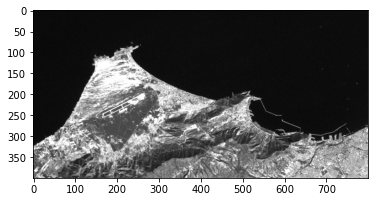

TM2.BMP:


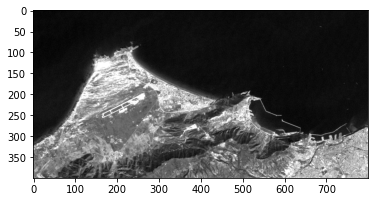

TM1.BMP:


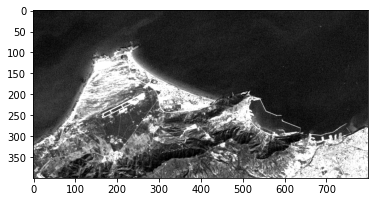

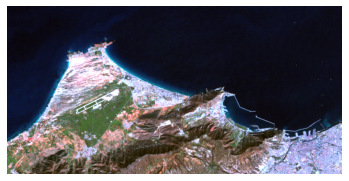

In [10]:
#encore!

temp3=ReadAffiche('TM7.BMP') #lecture de TM3.BMP au variable temporaire temp3 
temp2=ReadAffiche('TM2.BMP') #lecture de TM2.BMP au variable temporaire temp2
temp1=ReadAffiche('TM1.BMP') #lecture de TM1.BMP au variable temporaire temp1




#pas besoin de repeter sur TM1.BMP ET TM2.BMP (voir cellule precedente)
imgRGB[:,:,0]=temp3[:,:,0]/255
imgRGB[:,:,1]=temp2[:,:,1]/255
imgRGB[:,:,2]=temp1[:,:,2]/255

plt.imshow(imgRGB)
plt.axis('off')
plt.show()

CONCLUSION:
    
        -si par exemplr on choisit un image niveau de gris qui a le mer blanc dans le niveau bleu ne suffit pas 
        et les autre niveau de couleur on choisit celle avec la mer noir 
          ----> on obtient la mere bleu deans l'image couleur obtennu'
        
        DONC:
            -choisir un image niveau de gris selon seulement le le nivau de lumier sur un element avec un couleur trivial comme (la mere est bleu) dans un seul niveau de couleur (la meme avec le couleur  trivial de cet elemnt)
            et celle qui ce meme elemnt noir dans les autre niveau de couleur 
                ---> on obtient une faux couleur de ce element trivial dans l'image couleur resutlante'
                ---> on peut verifier ça par GIMP ou n'importe editeur d'image avec l'option pippette

# Etape 3 : affichage d’histograme

In [11]:
def Histogram(img): #tableau d'occurence des intesités du couleur
                    #img est une matrice image d'entré
    
    largeur,hauteur,couleur=img.shape ### attribution des variable avec des valeur de l'image d'entrée 
    
    occR=np.zeros(256)#occR=occurence de niveau de rouge
    occG=np.zeros(256)#occR=occurence de niveau de rouge
    occB=np.zeros(256)#occR=occurence de niveau de rouge
    
    
    ##########CREATION d'axe de occurence de niveau de couleur
    
    #print(clr) pour le debogage
    
    ###parcour des pixel par pixel par 2 boucle imbrique (premier en largeur et 2eme en hauteur)
    x=0   #initialison coordonné x
    while(x<largeur): #condition d'arret du coordonné x pour eviter l'overflow 
        y=0 #initialison coordonné y
        while(y<hauteur):#condition d'arret du coordonné y pour eviter l'overflow
            #print(x,y) pour le debogage
            occR[img[x,y,0]]=occR[img[x,y,0]]+1 ##incrementation d'occurence au un niveau de couleur ROUGE donné au 
                                                        #occR[niveau de couleur deja en entier]
            
            occG[img[x,y,1]]=occG[img[x,y,1]]+1##meme principe mais pour VERT
            occB[img[x,y,2]]=occB[img[x,y,2]]+1##meme principe mais pour BLEU

            y=y+1
        x=x+1    
        
    
    #print(clr)
        ###increment d'intesite du colueur si il existe dans coordonnées x,y d'image d'entrée 
    ###creation du 2nd axe (axe horizontal) pour les intensite couleur au niveau de gris avec pas de 1
    
    
    
    
    plt.rcParams["figure.figsize"] = [15,10] ##change le taille du figure par format d'image (proportions)
                                             #(la taille d'image qui englobe 
                                             #tous les element tel que:
                                             #le plot,les axe mais pas la legende)
                                             ## pas seulment la courbe au sens du 
                                             #la multiplication du fonction mathematiquement par un scalaire
                                              
    index=np.arange(256) ###un tablau 1d pour les valeur possible du niveau de couleur
                            #temporaire utilisé pour racourcir un peu le code
    
    plt.plot(index,occR[index],color='red', linewidth=0.9) ###mise en scene du courbe occR (nombre 
                                                            ##d'occourence du niveau du couleur 
                                                            ##rouge) en fonction index et 
                                                            ##epaisseur 0.9 (defualt est 1) (j'ai un 
                                                            ##peu raccouci pour
                                                            ##une meilleur precision)
                                                                                
    plt.plot(index,occG[index],color='green', linewidth=0.9)
    plt.plot(index,occB[index],color='blue', linewidth=0.9)
    plt.legend(['Rouge','Vert','Bleu'])##fonction du legende (les attributs ont le meme ordre avec les 3 
                                      #plots precedent)
    
    plt.xlabel('les intensité du couleur')
    plt.ylabel('les occurence des instensite')
    plt.show()
 

# REMARQUE:les image du test TMP1,TMP2 ...TMPP7 (sauf TMP6) ont
                            ## pour toux niveau de couleur le meme courbe d'hisotgrame de niveau de couleur qui 
                            ##sont superposés pour former une d'impression qu'il ya un seul courbe mais ils sont 
                            ##en realité 3 courbes identique superposés et
                            ##j'ai du utiliser le code histograme pour couleur (3 niveau) au celle 
                            ##(1 seul niveau) pour optimizer le code
                            

TM3.BMP:


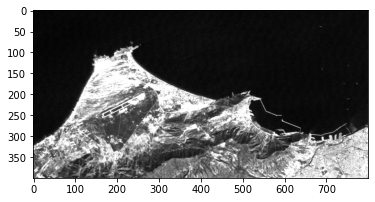

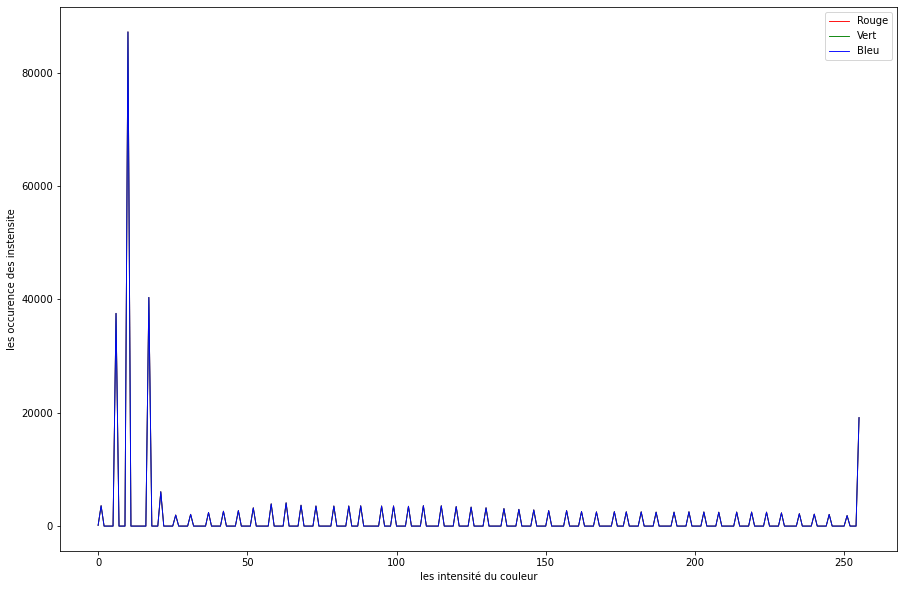

In [12]:
    
Histogram(ReadAffiche('TM3.BMP')) 

TM2.BMP:


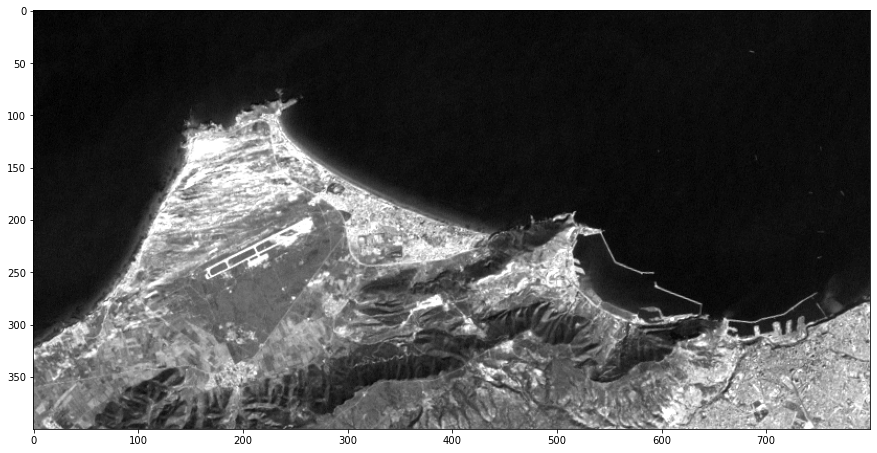

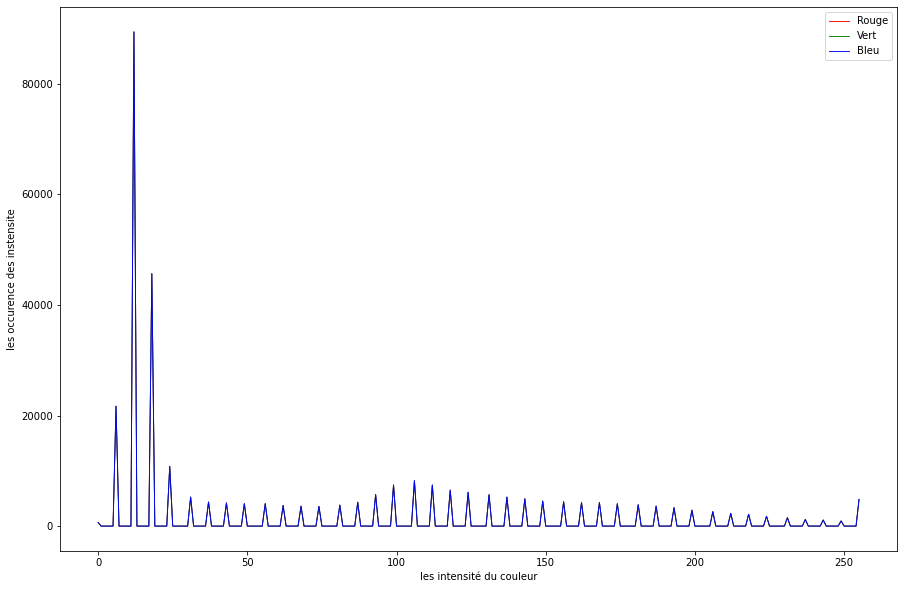

In [13]:
Histogram(ReadAffiche('TM2.BMP'))

TM1.BMP:


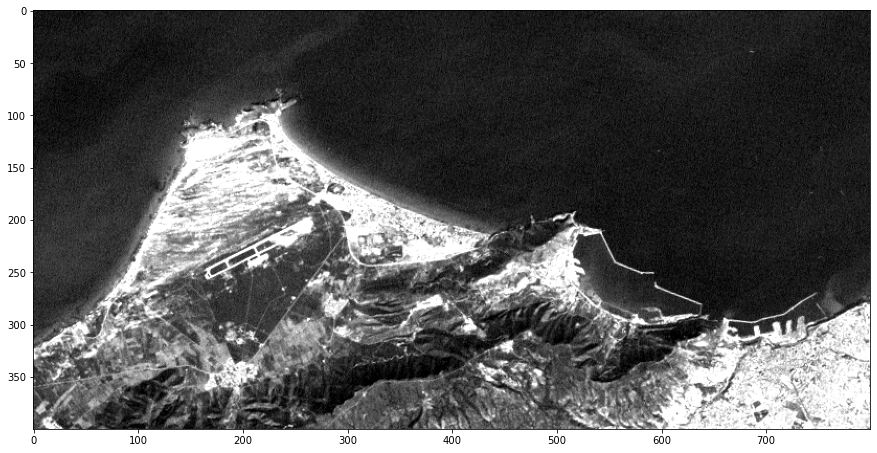

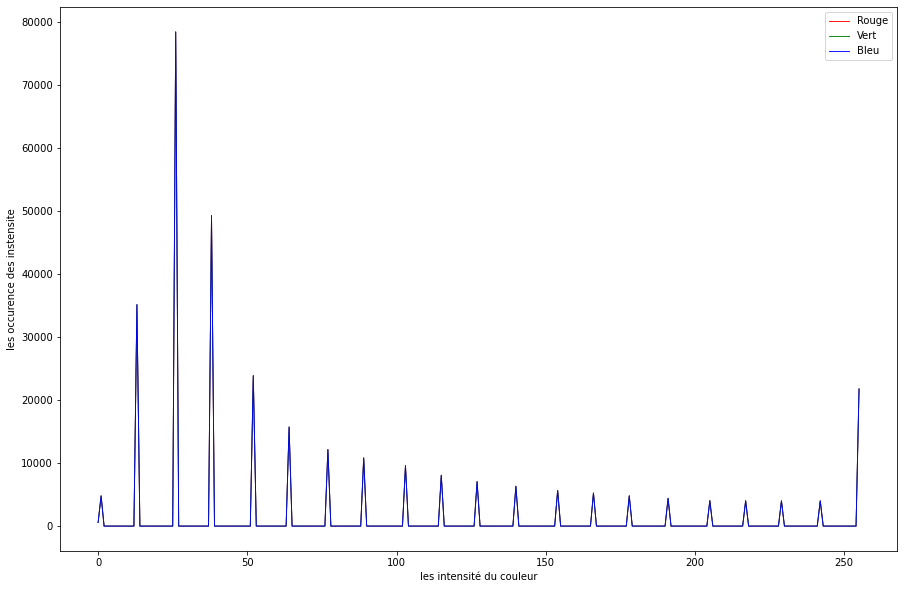

In [14]:
Histogram(ReadAffiche('TM1.BMP'))

# affichage histogram d'image en couleur

oui on peut afficher l'hisograme du niveu de gris pour un image colore ,en faisant 3 histograme pour chaque niveau de couleur de cette image dans un seul histograme

CLR.BMP:


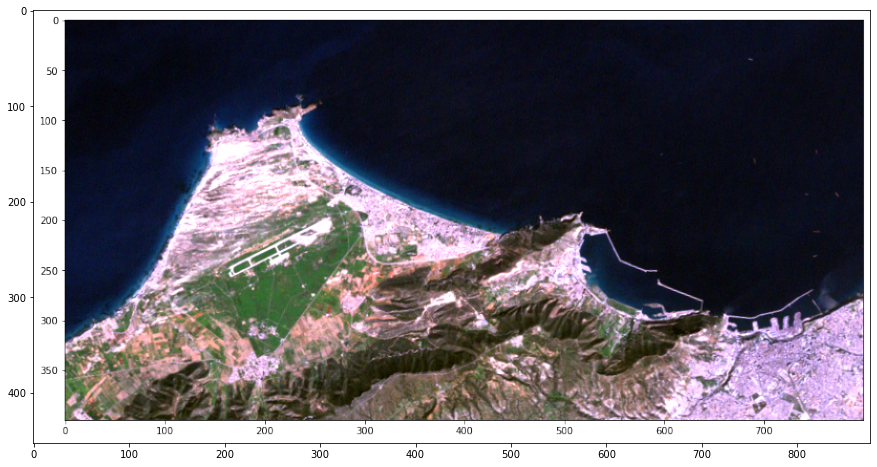

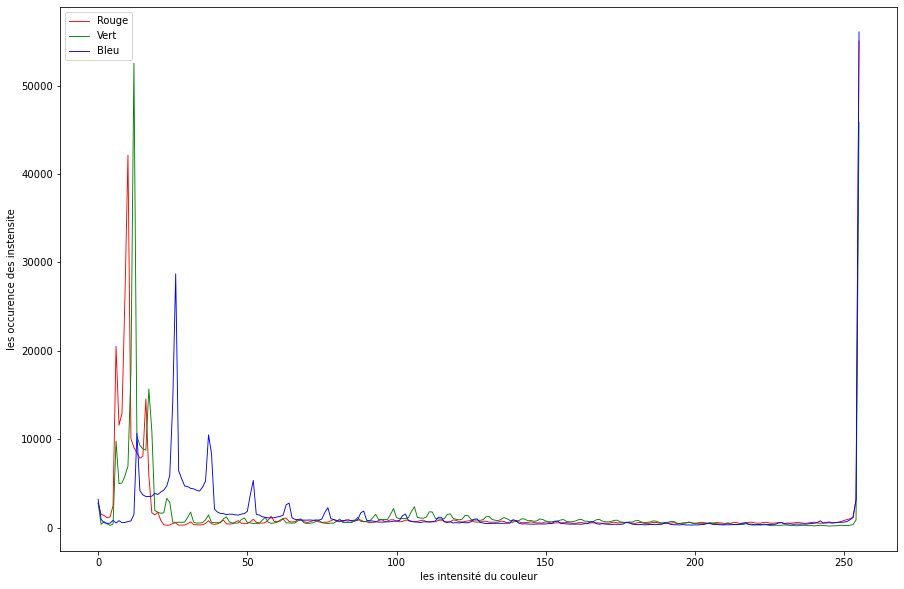

In [18]:
ImgClr=ReadAffiche('CLR.BMP') ##tm8.jpg est le resulat du combo 3/2/1 (demandé en question precedente)
Histogram(ImgClr)

les couleur les plus souvent:
1-les vert puis les rouge avec un peu d'ecart (selon le pic rouge et l'autre vert) ----> (vegetation et terrase de batiment) en vert et les routes qui sont en rouge (difficilemnt remarquable) sont tous les 2 souvent EN GENERALE ---> intensite du resau routier et intesnite du vegetation  
2-le pic bleu veu dire les intensite bleu sont moin souvent que le vert et rouge mais il reste souvent (pas rare)---> la montagne et

on note une meilleur clarté et precision mais pas de realisme dans les photos resultante a l'assemblement des image satelitair en niveu de gris 

CONCLUSION:
 l'histogram des couleur est plus efficace que le tatonemt sur les element triviaux : la mer bleu /la vegtation est verte etcc..) (cad la methode precedent)
